In [7]:
import pandas as pd
import plotly.express as px
from tqdm.notebook import tqdm

In [12]:
train_metadata = pd.read_csv('train_metadata.csv')
train_soundscape_labels = pd.read_csv('train_soundscape_labels.csv')
test = pd.read_csv('test.csv')

In [11]:
fig = px.bar(train_metadata['common_name'].value_counts().sort_values(ascending=True), orientation='h')
fig.show()

# Geo-encoding

In [36]:
fig = px.scatter_geo(train_metadata.sample(1000), lat='latitude', lon='longitude', color='common_name', height=800, width=1000)
fig.show()

In [38]:
from geopy.geocoders import Nominatim

In [67]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

def extract_country(Latitude, Longitude):
    location = geolocator.reverse(Latitude+","+Longitude)
    try:
        return location.raw['address']['country']
    except KeyError:
        return location.raw['adress']['locality']

In [60]:
countries = []
for lat,lon in tqdm(zip(train_metadata.latitude, train_metadata.longitude)): 
    countries.append(extract_country(str(lat), str(lon)))

0it [00:00, ?it/s]

KeyError: 'country'

# Data Cleaning

## Date & Time

In [120]:
from datetime import datetime
start = datetime(day=1,month=1,year=1960)
end = datetime(day=28,month=2,year=2021)

def date_checker(date):
    try:
        date = datetime.strptime(date, "%Y-%m-%d")
    except ValueError:
        return False
    
    if start <= date <= end:
        return True
    else:
        return False

date_check = train_metadata.date.apply(lambda date: date_checker(date))

In [122]:
train_metadata = train_metadata[date_check]

In [ ]:
'{0} rows {1} cols'.format(*train_metadata.shape)

In [151]:
def time_checker(time):
    try:
        datetime.strptime(time, '%H:%M').time()
        return True
    except ValueError:
        return False

In [154]:
time_check = train_metadata.time.apply(lambda time: time_checker(time))

In [155]:
train_metadata = train_metadata[time_check]

In [156]:
'{0} rows {1} cols'.format(*train_metadata.shape)

'56843 rows 14 cols'

In [157]:
train_metadata

primary_label                           secondary_labels  \
0            acafly                                 ['amegfi']   
2            acafly                                         []   
3            acafly                                ['whwbec1']   
4            acafly                                ['whwbec1']   
5            acafly                                         []   
...             ...                                        ...   
62869        yetvir                                         []   
62870        yetvir                                         []   
62871        yetvir  ['amered', 'eawpew', 'norcar', 'reevir1']   
62872        yetvir                                         []   
62873        yetvir                       ['gamqua', 'whwdov']   

                                                    type  latitude  longitude  \
0                   ['begging call', 'call', 'juvenile']   35.3860   -84.1250   
2                                               ['call']    5.7813   -75.7452   
3                                               ['call']    4.6717   -75.6283   
4                                               ['call']    4.6717   -75.6283   
5                                               ['call']    4.6717   -75.6283   
...                                                  ...       ...        ...   
62869                          ['adult', 'male', 'song']   30.2150   -97.6505   
62870  ['life stage uncertain', 'sex uncertain', 'song']   42.3005   -72.5877   
62871                          ['adult', 'male', 'song']   42.3005   -72.5877   
62872                                      ['uncertain']   32.2357   -99.8811   
62873                          ['adult', 'male', 'song']   31.9060  -109.1543   

           scientific_name            common_name                      author  \
0      Empidonax virescens     Acadian Flycatcher                 Mike Nelson   
2      Empidonax virescens     Acadian Flycatcher     Sergio Chaparro-Herrera   
3      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
4      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
5      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
...                    ...                    ...                         ...   
62869     Vireo flavifrons  Yellow-throated Vireo                Caleb Helsel   
62870     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62871     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62872     Vireo flavifrons  Yellow-throated Vireo                 Brad Banner   
62873     Vireo flavifrons  Yellow-throated Vireo          Richard E. Webster   

             date      filename  \
0      2012-08-12  XC109605.ogg   
2      2012-01-10  XC127032.ogg   
3      2009-06-19  XC129974.ogg   
4      2009-06-19  XC129981.ogg   
5      2007-11-05  XC130056.ogg   
...           ...           ...   
62869  2020-07-10  XC591680.ogg   
62870  2019-05-31  XC600085.ogg   
62871  2020-06-02  XC602701.ogg   
62872  2019-04-27  XC614733.ogg   
62873  2020-05-26  XC615888.ogg   

                                                 license  rating   time  \
0      Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
2      Creative Commons Attribution-NonCommercial-Sha...     3.0  15:20   
3      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
5      Creative Commons Attribution-NonCommercial-Sha...     4.0  07:45   
...                                                  ...     ...    ...   
62869  Creative Commons Attribution-NonCommercial-Sha...     1.0  08:30   
62870  Creative Commons Attribution-NonCommercial-Sha...     5.0  09:30   
62871  Creative Commons Attribution-NonCommercial-Sha...     4.5  08:30   
62872  Creative Commons Attribution-NonCommercial-Sha...     4.0  17:30   
62873  Creative Commo

# Audio

In [170]:
import os

In [173]:
files = []

for folder in os.listdir('sample_audio'):
    for file in os.listdir(f'sample_audio/{folder}'):
        files.append(file)

In [180]:
audio_sample = train_metadata[train_metadata['filename'].isin(files)]

In [ ]:
# Listen to it
import IPython.display as ipd

In [182]:
audio_sample

primary_label      secondary_labels  \
0            acafly            ['amegfi']   
132          acowoo                    []   
322          aldfly            ['rucwar']   
549          ameavo            ['sonspa']   
550          ameavo                    []   
...             ...                   ...   
62531        yerwar            ['whtspa']   
62715       yeteup1                    []   
62716       yeteup1                    []   
62767        yetvir  ['warvir', 'rewbla']   
62768        yetvir                    []   

                                       type  latitude  longitude  \
0      ['begging call', 'call', 'juvenile']   35.3860   -84.1250   
132                                ['call']   37.3144  -122.0632   
322                        ['call', 'song']   13.8570   -87.2350   
549                          ['alarm call']   37.4600  -122.1050   
550              ['call', 'female', 'male']   41.1267  -104.6970   
...                                     ...       ...        ...   
62531               ['call', 'flight call']   41.2042   -73.8861   
62715                              ['song']   14.5262   -91.1667   
62716                              ['song']   17.2226   -89.6237   
62767                              ['song']   41.7629   -73.4461   
62768                        ['alarm call']   18.0024   -94.5653   

               scientific_name               common_name  \
0          Empidonax virescens        Acadian Flycatcher   
132    Melanerpes formicivorus          Acorn Woodpecker   
322          Empidonax alnorum          Alder Flycatcher   
549    Recurvirostra americana           American Avocet   
550    Recurvirostra americana           American Avocet   
...                        ...                       ...   
62531       Setophaga coronata     Yellow-rumped Warbler   
62715    Euphonia hirundinacea  Yellow-throated Euphonia   
62716    Euphonia hirundinacea  Yellow-throated Euphonia   
62767         Vireo flavifrons     Yellow-throated Vireo   
62768         Vireo flavifrons     Yellow-throated Vireo   

                                         author        date      filename  \
0                                   Mike Nelson  2012-08-12  XC109605.ogg   
132                            Jonathon Jongsma  2012-09-09  XC110258.ogg   
322                               John van Dort  2013-05-10  XC133197.ogg   
549                            Jonathon Jongsma  2012-04-21  XC133080.ogg   
550                               GABRIEL LEITE  2013-04-30  XC139829.ogg   
...                                         ...         ...           ...   
62531                             Daniel Parker  2012-09-29  XC122173.ogg   
62715                               Mike Nelson  2013-03-07  XC126533.ogg   
62716                               Mike Nelson  2013-03-10  XC126537.ogg   
62767  Jorge de Leon Cardozo and Susan Hochgraf  2012-05-20  XC120867.ogg   
62768                          Manuel Grosselet  2013-03-16  XC125806.ogg   

                                                 license  rating   time  \
0      Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
132          Creative Commons Attribution-ShareAlike 3.0     4.0  15:13   
322    Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
549          Creative Commons Attribution-ShareAlike 3.0     3.5  07:40   
550    Creative Commons Attribution-NonCommercial-Sha...     4.0  09:00   
...                                                  ...     ...    ...   
62531  Creative Commons Attribution-NonCommercial-Sha...     0.5   4:20   
62715  Creative Commons Attribution-NonCommercial-Sha...     4.0  14:00   
62716  Creative Commons Attribution-NonCommercial-Sha...     4.0  10:00   
62767  Creative Commons Attribution-NonCommercial-Sha...     3.5  17:00   
62768  Creative Commons Attribution-NonCommercial-Sha...     4.0  08:00   

                                     url  
0      https://www.xeno-canto.org/109605  
132    https://

In [183]:
# Pick a file
audio_path = 'sample_audio/yetvir/XC120867.ogg'

ipd.Audio(audio_path, autoplay=True)

In [211]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# Librosa is the most versatile audio library for Python 
# and uses FFMPEG to load and open audio files
# For more information visit: https://librosa.org/doc/latest/index.html
import librosa

# Load the first 15 seconds this file using librosa
sig, rate = librosa.load(audio_path, sr=32000, offset=None)

# The result is a 1D numpy array that conatains audio samples. 
# Take a look at the shape (seconds * sample rate == 15 * 32000 == 480000)
print('SIGNAL SHAPE:', sig.shape)

SIGNAL SHAPE: (1236777,)


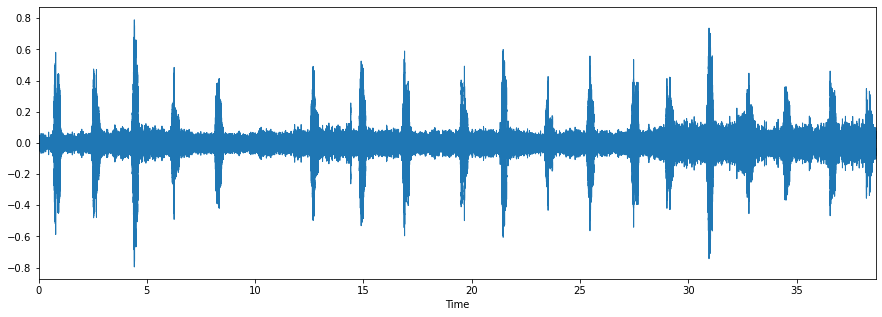

In [212]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(sig, sr=32000)

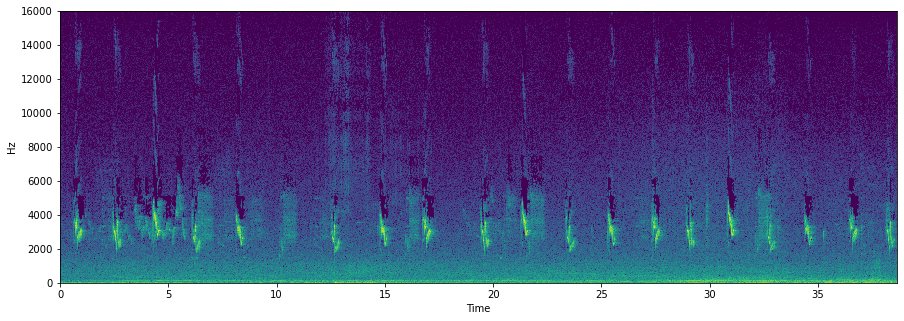

In [213]:
# First, compute the spectrogram using the "short-time Fourier transform" (stft)
spec = librosa.stft(sig)

# Scale the amplitudes according to the decibel scale
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(spec_db, 
                         sr=32000, 
                         x_axis='time', 
                         y_axis='hz', 
                         cmap=plt.get_cmap('viridis'))

## ICA

https://towardsdatascience.com/independent-component-analysis-ica-in-python-a0ef0db0955e

In [198]:
from sklearn.decomposition import FastICA
from scipy import signal

In [214]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(spec_db)

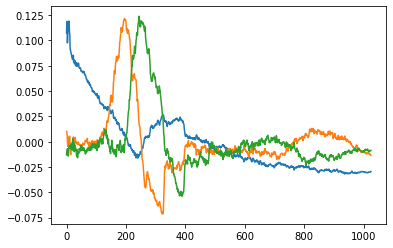

In [216]:
plt.plot(S_)
plt.show()

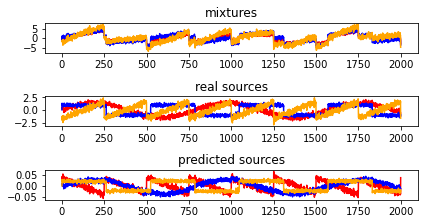

In [199]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
fig = plt.figure()
models = [X, S, S_]
names = ['mixtures', 'real sources', 'predicted sources']
colors = ['red', 'blue', 'orange']
for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
        
fig.tight_layout()        
plt.show()

In [200]:
X

array([[-0.74486315, -0.91401507, -1.81570038],
       [ 0.03932519,  1.06492993, -1.58715033],
       [-0.40766041,  0.39786915, -1.90998106],
       ...,
       [ 0.23856791, -0.28486909,  1.38619226],
       [-0.00653213, -0.99317023,  1.48134842],
       [-3.00301507, -3.62816891, -4.8258685 ]])